findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


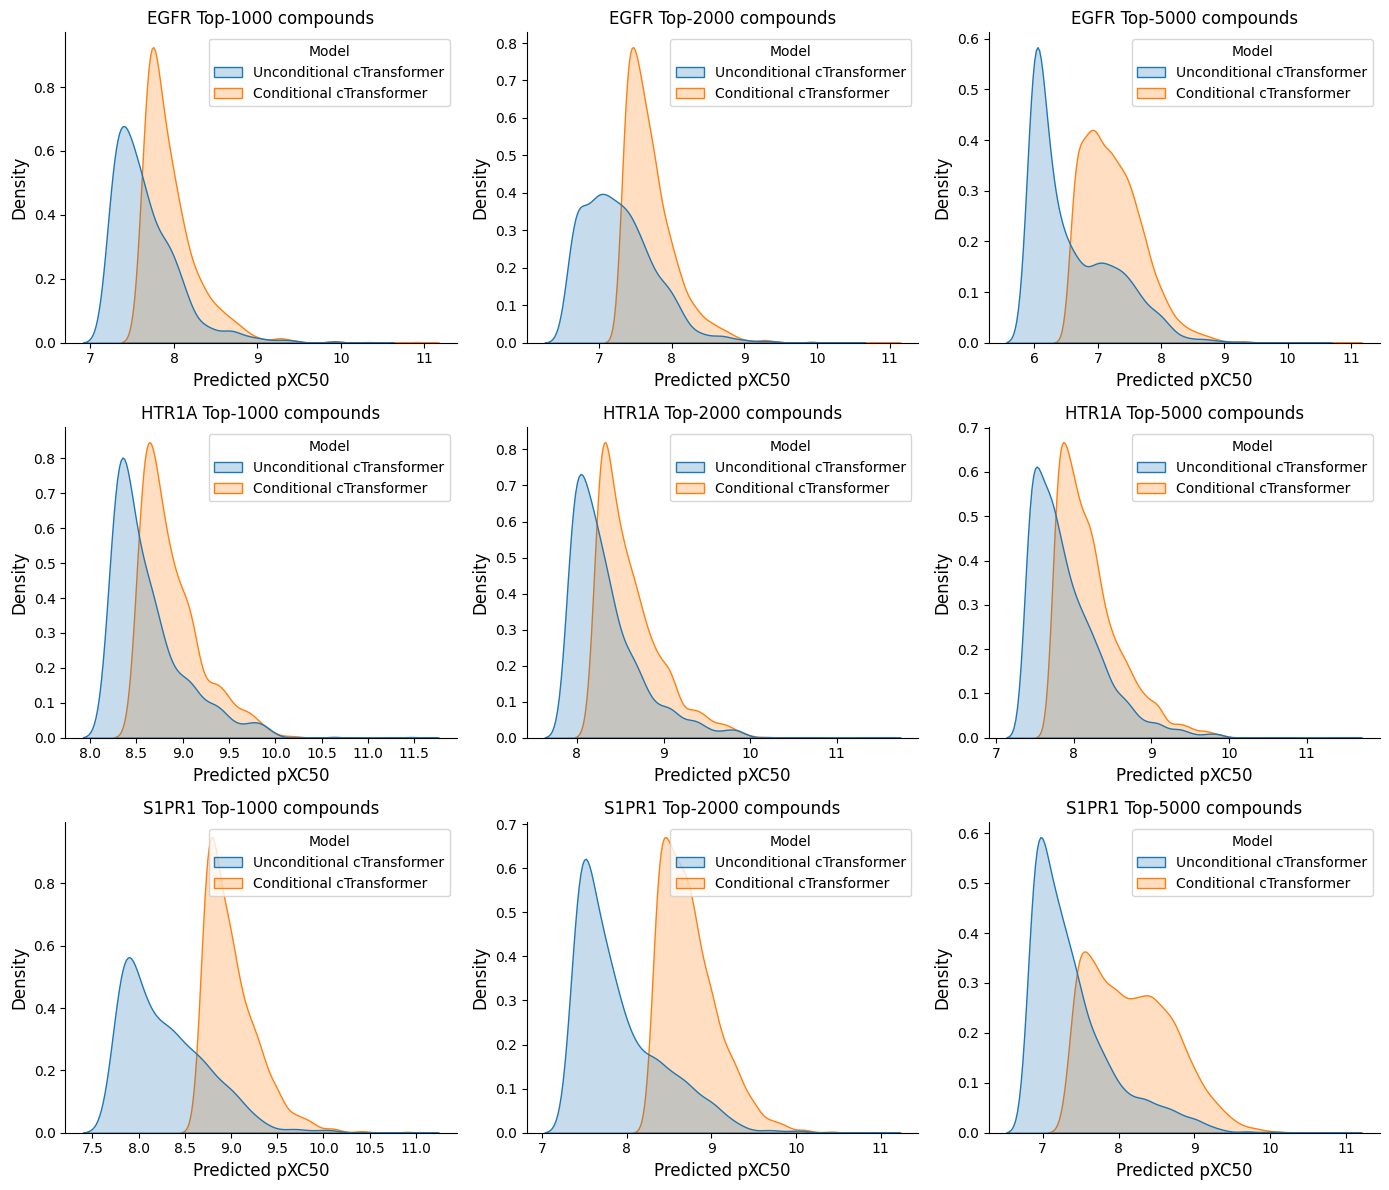

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
pal=list(sns.color_palette("tab10"))

fig, axes = plt.subplots(3, 3, figsize=(14, 12))

names = [
    'EGFR',
    'HTR1A',
    'S1PR1'
]

num = [
    1000,
    2000,
    5000
]

for i, name in enumerate(names):
    for j, n in enumerate(num):
        # rnn = pd.DataFrame({'pred_pXC50':np.load('./npy/y/{}_RNN_Y.npy'.format(name))}).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        # rnn['Model']='cRNN'

        unconditional = pd.DataFrame({
            'pred_pXC50': np.load('../generated_molecules/npy/{}_Unconditional_Y.npy'.format(name))
        }).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        unconditional['Model']='Unconditional cTransformer'

        trans = pd.DataFrame(
            {'pred_pXC50':np.load('../generated_molecules/npy/{}_Conditional_Y.npy'.format(name))}
        ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        trans['Model']='Conditional cTransformer'

        df = pd.concat([unconditional, trans]).reset_index()
        sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Model',ax=axes[i, j], fill=True)

        axes[i, j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].set_ylabel("Density", fontsize=12)
        axes[i, j].set_xlabel("Predicted pXC50", fontsize=12)


    plt.tight_layout()
    # plt.savefig(
    #     'Unconditional-X-Target.png',
    #     dpi=250
    # )
plt.show()

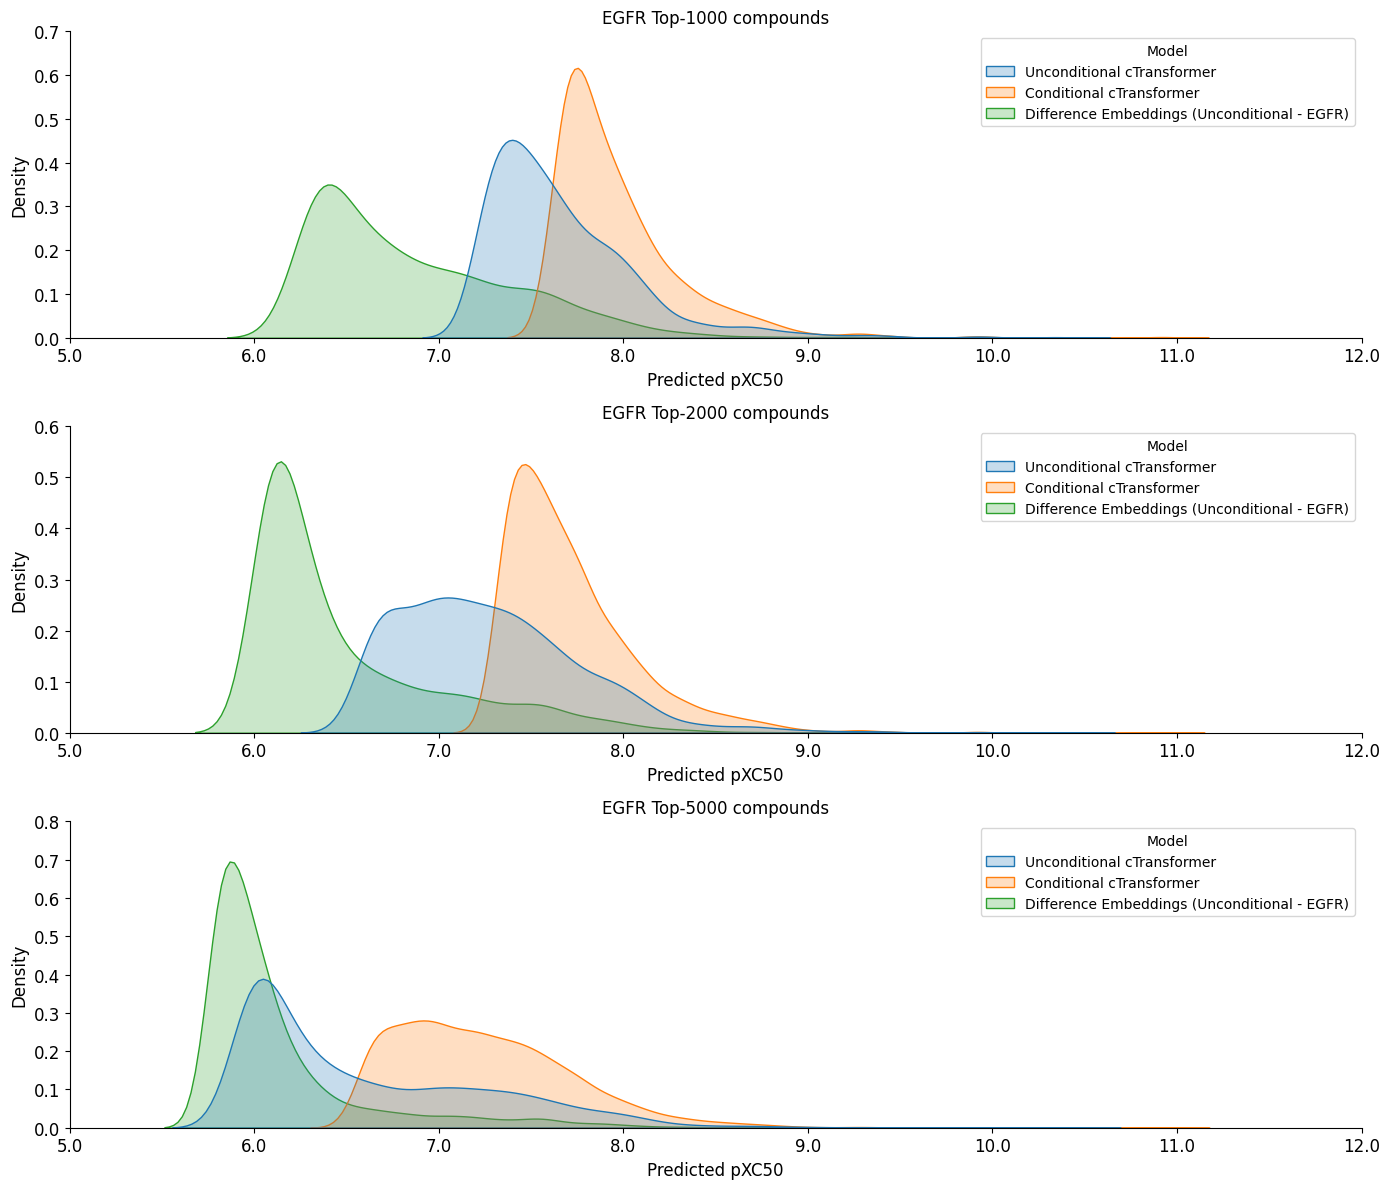

In [2]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

name = "EGFR"
second_target = "HTR1A"
third_target = "S1PR1"

i=0

for j, n in enumerate(num):
    df_list = []

    unconditional = pd.DataFrame({
        'pred_pXC50': np.load('../generated_molecules/npy/{}_Unconditional_Y.npy'.format(name))
    }).sort_values(by=['pred_pXC50'],ascending=False).head(n)
    unconditional['Model']='Unconditional cTransformer'
    df_list.append(unconditional)

    trans = pd.DataFrame(
        {'pred_pXC50':np.load('../generated_molecules/npy/{}_Conditional_Y.npy'.format(name))}
    ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
    trans['Model']='Conditional cTransformer'
    df_list.append(trans)

    exclude_unconditional = pd.DataFrame(
        {'pred_pXC50':np.load(f'../generated_molecules/npy/Unconditional-{name}-DIFF_Y.npy')}
    ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
    exclude_unconditional['Model']=f'Difference Embeddings (Unconditional - {name})'
    df_list.append(exclude_unconditional)

    df = pd.concat(df_list).reset_index()
    sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Model',ax=axes[j], fill=True)

    axes[j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
    axes[j].spines['right'].set_visible(False)
    axes[j].spines['top'].set_visible(False)
    axes[j].set_ylabel("Density", fontsize=12)
    axes[j].set_xlabel("Predicted pXC50", fontsize=12)
    axes[j].yaxis.set_ticks(axes[j].get_yticks())
    axes[j].xaxis.set_ticks(axes[j].get_xticks())
    axes[j].set_yticklabels(axes[j].get_yticks().round(4), size=12)
    axes[j].set_xticklabels(axes[j].get_xticks().round(2), size=12)


plt.tight_layout()
plt.show()

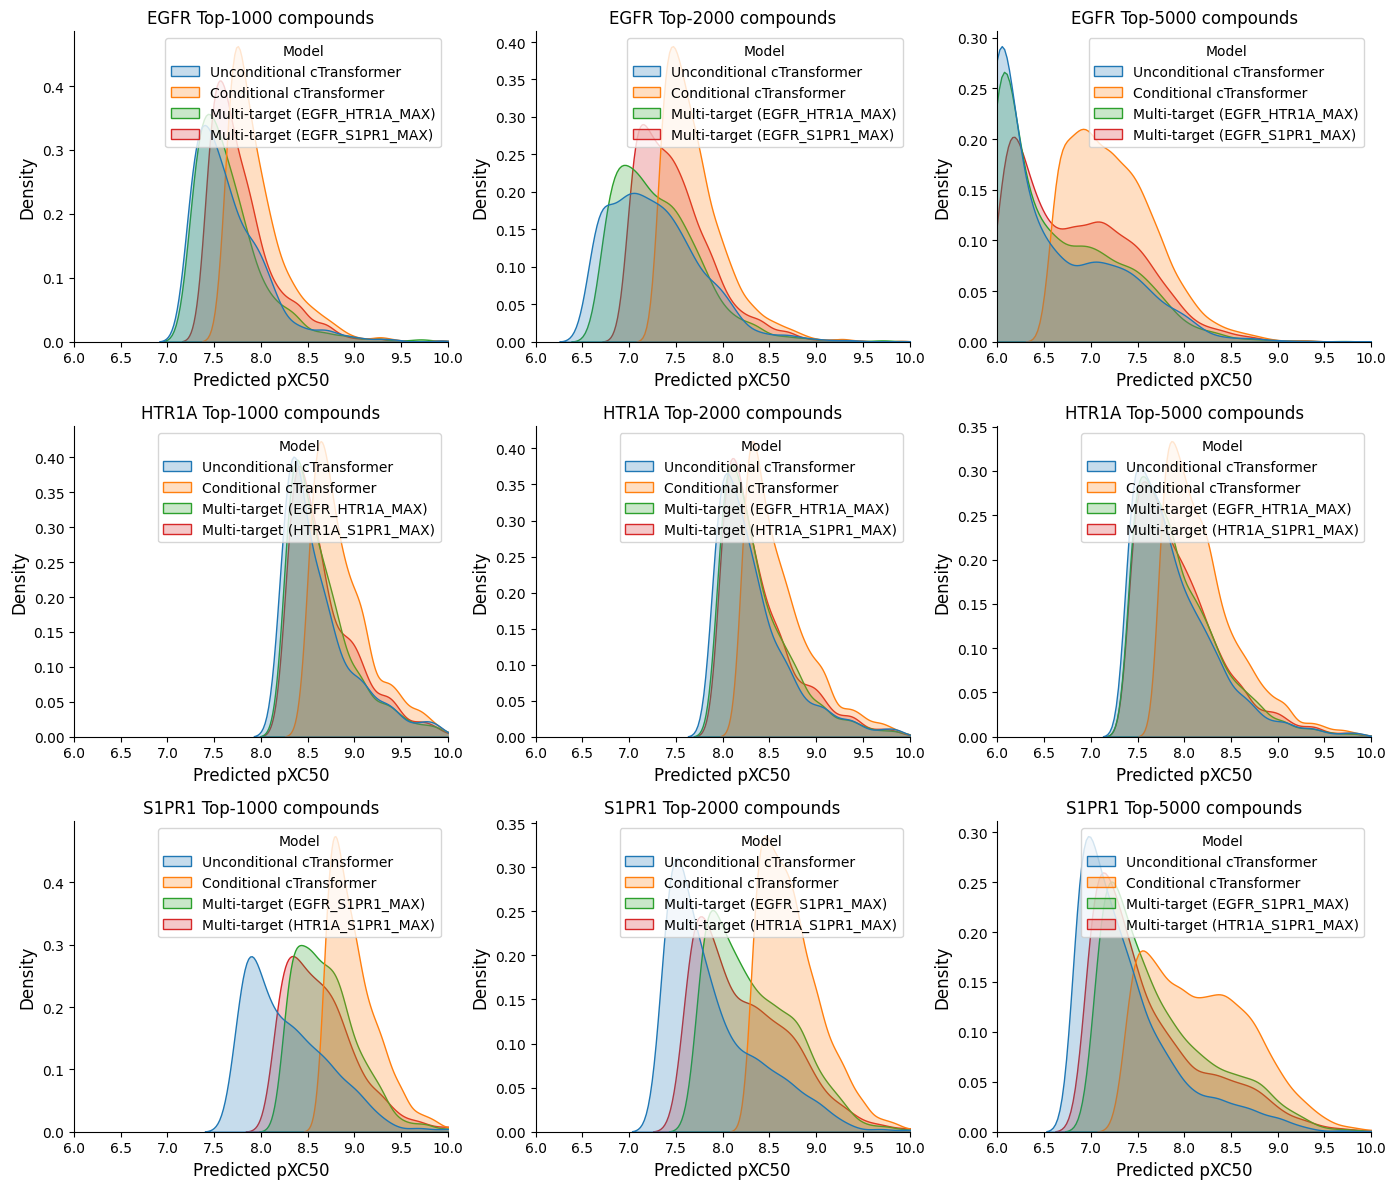

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))

names = [
    # 'Unconditional',
    'EGFR',
    'HTR1A',
    'S1PR1'
]

agg = "MAX"

multi_targets = [
    f"EGFR_HTR1A_{agg}",
    f"EGFR_S1PR1_{agg}",
    f"HTR1A_S1PR1_{agg}"
]

num = [
    1000,
    2000,
    5000
]

for i, name in enumerate(names):
    for j, n in enumerate(num):
        df_list = []

        unconditional = pd.DataFrame({
            'pred_pXC50': np.load('../generated_molecules/npy/{}_Unconditional_Y.npy'.format(name))
        }).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        unconditional['Model']='Unconditional cTransformer'
        df_list.append(unconditional)

        single_target = pd.DataFrame(
            {'pred_pXC50':np.load('../generated_molecules/npy/{}_Conditional_Y.npy'.format(name))}
        ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        single_target['Model']='Conditional cTransformer'
        df_list.append(single_target)

        for targets in multi_targets:
            if name in targets:
                multi_target = pd.DataFrame(
                    {'pred_pXC50':np.load(f'../generated_molecules/npy/{targets}_Y_{name}.npy')}
                ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
                multi_target['Model']=f'Multi-target ({targets})'
                df_list.append(multi_target)

        df = pd.concat(df_list).reset_index()
        sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Model',ax=axes[i, j], fill=True)

        axes[i, j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].set_ylabel("Density", fontsize=12)
        axes[i, j].set_xlabel("Predicted pXC50", fontsize=12)
        # axes[i, j].yaxis.set_ticks(axes[i, j].get_yticks())
        # axes[i, j].xaxis.set_ticks(axes[i, j].get_xticks())
        # axes[i, j].set_yticklabels(axes[i, j].get_yticks().round(4), size=12)
        # axes[i, j].set_xticklabels(axes[i, j].get_xticks().round(2), size=12)

        # axes[i, j].yaxis.set_ticks())
        # Limit the x-axis to 7-10
        axes[i, j].set_xlim(6, 10)

plt.tight_layout()
plt.show()

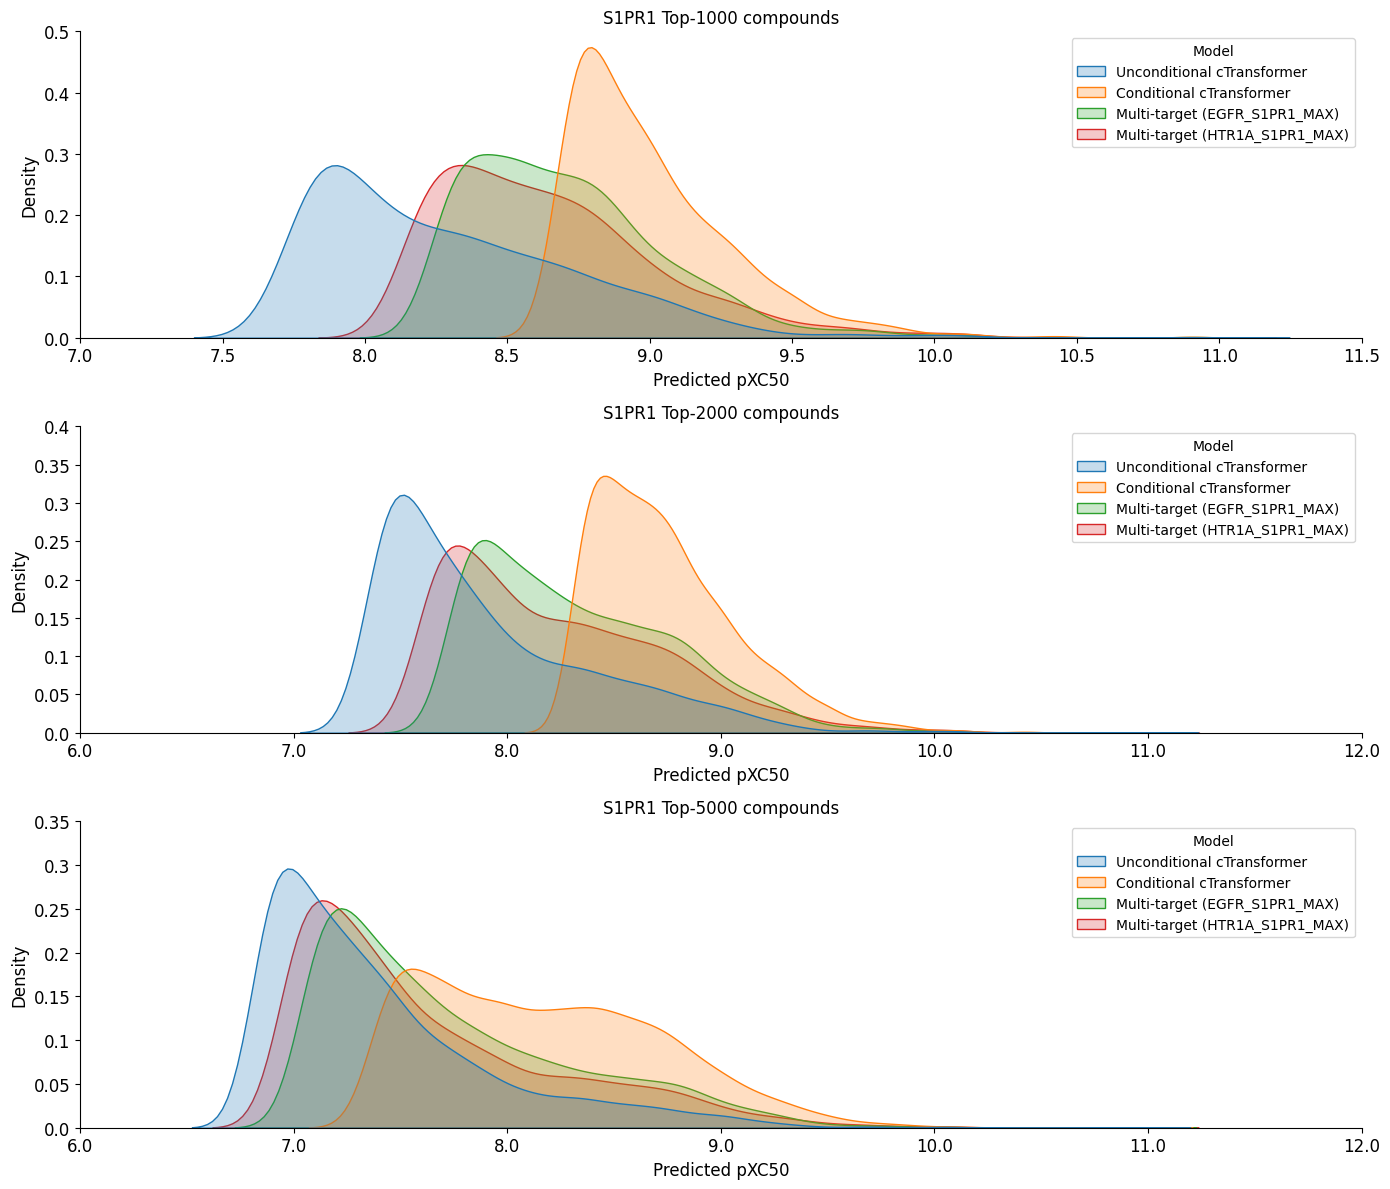

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

name = "S1PR1"

agg = "MAX"

multi_targets = [
    f"EGFR_HTR1A_{agg}",
    f"EGFR_S1PR1_{agg}",
    f"HTR1A_S1PR1_{agg}"
]

num = [
    1000,
    2000,
    5000
]

i=0

for j, n in enumerate(num):
    df_list = []

    unconditional = pd.DataFrame({
        'pred_pXC50': np.load('../generated_molecules/npy/{}_Unconditional_Y.npy'.format(name))
    }).sort_values(by=['pred_pXC50'],ascending=False).head(n)
    unconditional['Model']='Unconditional cTransformer'
    df_list.append(unconditional)

    single_target = pd.DataFrame(
        {'pred_pXC50':np.load('../generated_molecules/npy/{}_Conditional_Y.npy'.format(name))}
    ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
    single_target['Model']='Conditional cTransformer'
    df_list.append(single_target)

    for targets in multi_targets:
        if name in targets:
            multi_target = pd.DataFrame(
                {'pred_pXC50':np.load(f'../generated_molecules/npy/{targets}_Y_{name}.npy')}
            ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
            multi_target['Model']=f'Multi-target ({targets})'
            df_list.append(multi_target)

    df = pd.concat(df_list).reset_index()

    sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Model',ax=axes[j], fill=True)

    axes[j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
    axes[j].spines['right'].set_visible(False)
    axes[j].spines['top'].set_visible(False)
    axes[j].set_ylabel("Density", fontsize=12)
    axes[j].set_xlabel("Predicted pXC50", fontsize=12)
    axes[j].yaxis.set_ticks(axes[j].get_yticks())
    axes[j].xaxis.set_ticks(axes[j].get_xticks())
    axes[j].set_yticklabels(axes[j].get_yticks().round(4), size=12)
    axes[j].set_xticklabels(axes[j].get_xticks().round(2), size=12)


plt.tight_layout()
plt.show()